In [45]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import sklearn
import pickle
import importlib.util

In [46]:
# importing utility file 
spec = importlib.util.spec_from_file_location("Util","/home/bridgeit/PycharmProjects/Machine-Learning-Fellowship/week10/Utility/util_class.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
util_obj = foo.Util()

In [47]:
#load and csv file
data_module= pd.read_csv("Social_Network_Ads.csv")
data_module.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [48]:
data_module.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [49]:
data_module.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [50]:
data_module =data_module[['Age','EstimatedSalary','Purchased']]

In [51]:
#split dataset into train and test
train,test=train_test_split(data_module,test_size=0.2,random_state=0)
print("train",train.shape)
print("test",test.shape)

train (320, 3)
test (80, 3)


In [52]:
train.to_csv('train.csv',index=0)
test.to_csv('test.csv',index=0)

In [53]:
train_module= pd.read_csv('train.csv')

In [54]:
train_data,cv_data = train_test_split(train_module,test_size=0.2,random_state=0)

In [55]:
print("train_data",train_data.shape)
print("cv_data",cv_data.shape)

train_data (256, 3)
cv_data (64, 3)


In [56]:
x_train= train_data.iloc[:,[0,1]].values
y_train = train_data.iloc[:,2].values
print('x_train',x_train.shape)
print('y_train',y_train.shape)

x_train (256, 2)
y_train (256,)


In [57]:
#feature scalling
sc_x = StandardScaler()
# sc_y= StandardScaler()
x_train =sc_x.fit_transform(x_train)
# y_train =sc_y.transform(y_train.reshape(-1,1))


In [58]:
 cv_data.to_csv("cv_data.csv",index=0)

In [59]:
cv_data = pd.read_csv("cv_data.csv")

In [60]:
cv_x= cv_data.iloc[:,[0,1]].values
cv_y=cv_data.iloc[:,2].values
print('cross validate data x',cv_x.shape)
print('cross validate data y',cv_y.shape)

cross validate data x (64, 2)
cross validate data y (64,)


In [61]:
#feature scalling
sc_cv_x = StandardScaler()
# sc_cv_y= StandardScaler()
cv_x= sc_cv_x.fit_transform(cv_x)
# cv_y =sc_cv_y.fit_transform(cv_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)
predict value [1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0]
confusion matrix is: [[148  13]
 [ 31  64]]
accuracy 82.8125


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


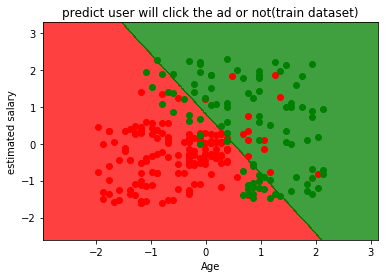

In [62]:
class Support_vector_Regression:
    def support_vector_model(self,x_train,y_train):
        classifier = SVC(kernel='linear',random_state=0)
        classifier.fit(x_train,y_train)
#         print(x_train,y_train)
        return classifier
              
def main():
    obj = Support_vector_Regression()
    
    classifier = obj.support_vector_model(x_train,y_train)
    print(classifier)
    
    predict = util_obj.predict(x_train,classifier)
    print("predict value",predict)
    
    cm = util_obj.confusion_matrix(y_train,predict)
    print('confusion matrix is:',cm)
   
    accuracy = util_obj.accuracy(predict,y_train)
    print("accuracy",accuracy)
    
#     util_obj.create_pickle(classifier,'Support_vector_Regression.pkl' )
#     print("Pikle file created")
    
    
    util_obj.visualization(x_train,y_train,predict,classifier)

if __name__ == '__main__':
    main()
        

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)
predict value [1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0]
confusion matrix is: [[34  4]
 [ 5 21]]
accuracy 85.9375
Pikle file created


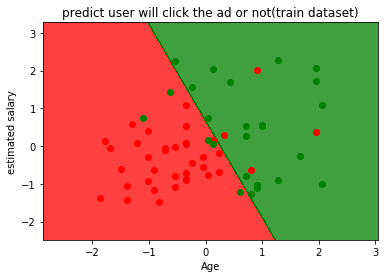

In [63]:
class Cross_validataion:
     def support_vector_model(self,x_train,y_train):
        classifier = SVC(kernel='linear',random_state=0)
        classifier.fit(x_train,y_train)
#         print(x_train,y_train)
        return classifier
           
def main():
    obj =Cross_validataion()
    
    classifier = obj.support_vector_model(cv_x,cv_y)
    print(classifier)
    
    predict = util_obj.predict(cv_x,classifier)
    print("predict value",predict)
    
    cm = util_obj.confusion_matrix(cv_y,predict)
    print('confusion matrix is:',cm)
   
    accuracy = util_obj.accuracy(predict,cv_y)
    print("accuracy",accuracy)
   
    # create pickle file
    util_obj.create_pickle(classifier,'Support_vector_Regression.pkl' )
    print("Pikle file created")
    
    util_obj.visualization(cv_x,cv_y,predict,classifier)

if __name__ == '__main__':
    main()